In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
torch.manual_seed(1)    # reproducible

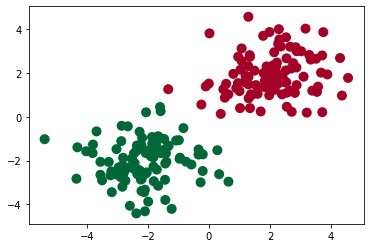

In [3]:
# make some fake data and display them
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2), with mean=2, variance=1
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1), label = 0
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2), with mean=-2, variance=1
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1), label = 1
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [4]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.out(x)
        return x

In [5]:
net = Net(n_feature=2, n_hidden=10, n_output=2)     # instantiate the network
print(net)  # print the net architecture

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [6]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2) # initialize the optimizer, SGD ==> 梯度下降
loss_func = torch.nn.CrossEntropyLoss()  # this is for regression mean squared loss, 交叉熵损失函数

In [7]:
plt.ion()   # something about plotting

/home/jonathanwang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


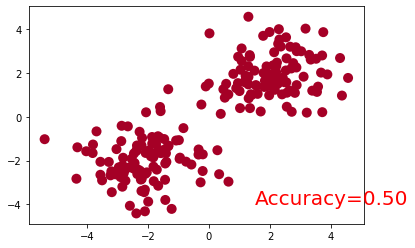

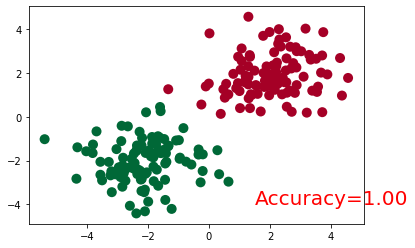

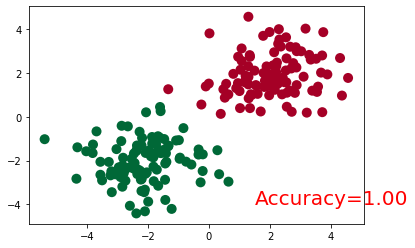

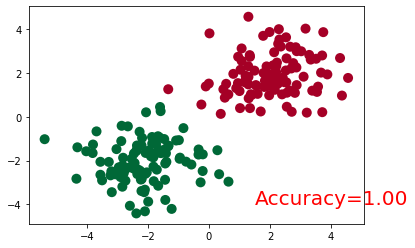

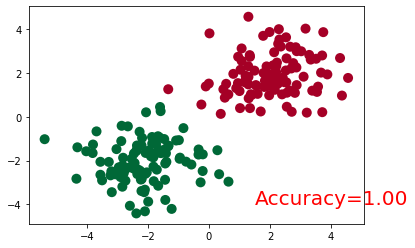

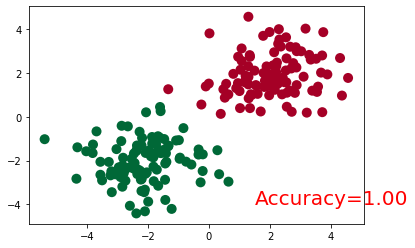

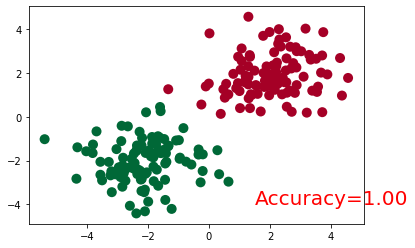

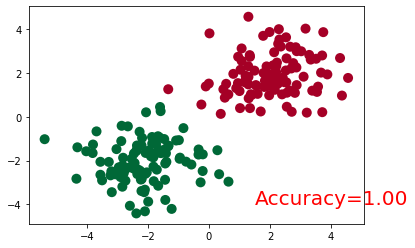

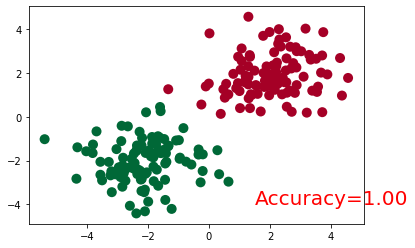

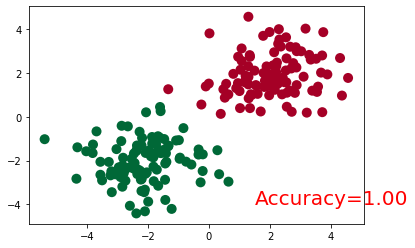

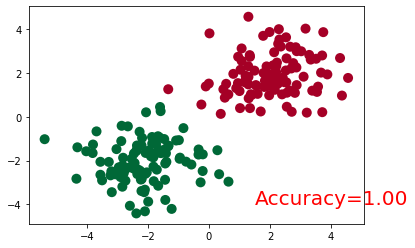

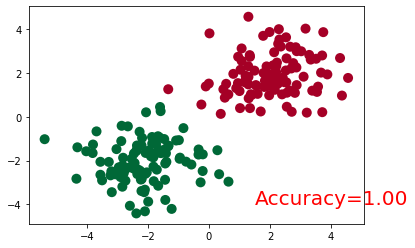

In [8]:
for t in range(100):
    out = net(x)    # input x and predict based on x
    
    loss = loss_func(out, y)    # must be (1. nn output, 2. target)
    
    optimizer.zero_grad()   # must clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients to renew your params
    
    if t % 10 == 0 or t in [3, 6]:
        # plot and show learning process
        plt.cla()
        _, prediction = torch.max(F.softmax(out), 1)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()